![](python-api.png)

![](jupyter-notebook.png)

# Hello, San Diego

In [15]:
1+2

3

In [2]:
from arcgis import *

In [16]:
gis = GIS('https://deldev.maps.arcgis.com', 'rohitgeo')

Enter password: ········


In [5]:
m = gis.map('San Diego')
m


In [6]:
items = gis.content.search('San Diego')

<Item title:"Places to see in San Diego" type:Feature Collection owner:deldev>
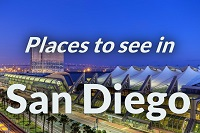

<Item title:"San Diego Trolley stations" type:Feature Collection owner:deldev>
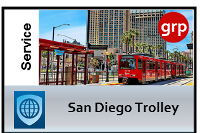

<Item title:"San Diego attractions web map" type:Web Map owner:deldev>
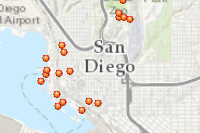

In [7]:
for item in items:
    display(item)

In [8]:
places = items[0]
trolley = items[1]

In [9]:
m2 = gis.map('San Diego', zoomlevel=14)
m2

In [10]:
m2.add_layer([trolley, places])

In [11]:
walkable = create_drive_time_areas(trolley, [5], 'Minutes', travel_mode='Walking')

In [12]:
myplaces = overlay_layers(places, walkable)

In [13]:
myplaces.query().df[['NAME', 'Title', 'ADDRESS']]

,NAME,Title,ADDRESS
0,Welcome to San Diego!,SANTA FE DEPOT,
1,Convention Center skywalk and stairs,GASLAMP QUARTER TROLLEY STATION,
2,Gaslamp Quarter,GASLAMP QUARTER TROLLEY STATION,Fifth Avenue from the Convention Center north ...
3,Petco Park,GASLAMP QUARTER TROLLEY STATION,
4,The Headquarters at Seaport District,SEAPORT VILLAGE TROLLEY STATION,"789 West Harbor Drive, San Diego, CA 92101."
5,Ferry to Coronado,AMERICA PLAZA TROLLEY STATION,Ferries run every hour.
6,Train trip up the coast,SANTA FE DEPOT,The point on the map shows San Diego's downtow...
7,San Diego Maritime Museum,COUNTY CENTER/LITTLE ITALY TROLLEY STATION,"1492 North Harbor Drive, San Diego, CA 92101."
8,Little Italy neighborhood,COUNTY CENTER/LITTLE ITALY TROLLEY STATION,Along India Street north of Ash Street to Juni...
9,Little Italy Mercato,COUNTY CENTER/LITTLE ITALY TROLLEY STATION,Along West Cedar Street between Kettner Boulev...


In [14]:
m2.add_layer([walkable, myplaces])